Shapefiles can be downloaded here, [Download Census Tract Shapefiles](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.html). To get longitude and latitude for visits, merge shapefiles and weekly patterns.


In [1]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import os
conda_dir = os.environ.get('CONDA_PREFIX')
proj_lib = os.path.join(conda_dir, 'share', 'proj')
os.environ['PROJ_LIB'] = proj_lib
from mpl_toolkits.basemap import Basemap
import seaborn as sns
sns.set()

In [2]:
def plot_map(
    gdf, 
    visits=None, 
    show_base=True, 
    show_lines=True, 
    line_color='blue',
    alpha=0.5,
    show_centroids=False, 
    save_path=None,
    ):
    
    fig, ax = plt.subplots(1, 1, figsize=(5,5))
    
    ax.set_facecolor('white')
    
    m = Basemap(projection='merc',
                llcrnrlon=-95.99, llcrnrlat=29.47,
                urcrnrlon=-94.89, urcrnrlat=30.2,
                resolution='i')
    if show_base:
        m.fillcontinents(color='white', lake_color='lightblue')
        m.drawcounties()
        for poly in gdf['geometry']:
            if poly.geom_type == 'Polygon':
                x, y = poly.exterior.xy
                mx, my = m(x, y)
                m.plot(mx, my, 'k-', linewidth=0.5)
            elif poly.geom_type == 'MultiPolygon':
                for part in poly:
                    x, y = part.exterior.xy
                    mx, my = m(x, y)
                    m.plot(mx, my, 'k-', linewidth=0.5)
        if show_centroids:
            for point in gdf.centroid:
                mx, my = m(point.x, point.y)
                m.plot(mx, my, 'ko', markersize=3)

    if show_lines and visits is not None:
        for idx, row in visits.iterrows():
            x1, y1 = m(row['source_lon'], row['source_lat'])
            x2, y2 = m(row['target_lon'], row['target_lat'])
            m.plot([x1, x2], [y1, y2], color=line_color, linewidth=0.5, alpha=alpha)

    if save_path:
        plt.savefig(save_path, bbox_inches='tight', transparent=True)
    
    plt.show()
    return None


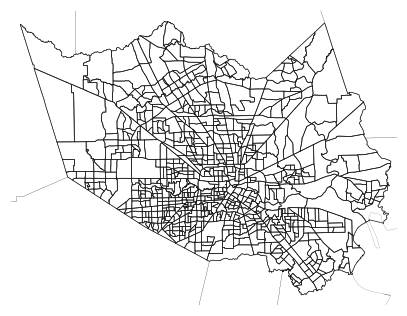

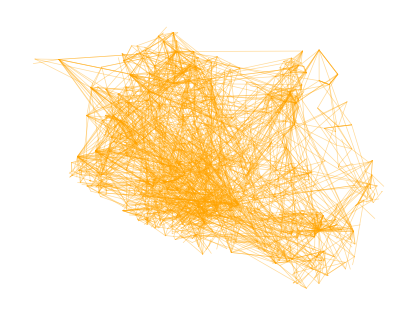

In [3]:
gdf = gpd.read_file('../data/shape_files/tl_2018_48_tract.shp')
gdf = gdf.to_crs(epsg=4326)
gdf = gdf[gdf['GEOID'].str.startswith('48201')]  # Harris County

visits = pd.read_csv('../data/latlon_week07/61.csv')

plot_map(gdf)
plot_map(
    gdf, 
    visits, 
    show_base=False, 
    show_lines=True, 
    line_color='orange',
    alpha=0.4,
    show_centroids=False, 
    save_path=None
    )

